In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages for EDA & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing required packages from statsmodels and sklearn libraries for regression modelling
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Step 1: Reading and understanding the DataFrame
- Reading the file
- Inspecting the shape of DF, understanding different columns in DF
- Basic cleanup - removing unwanted column
- Identifying if any outliers are present in data and setting strategy to handle outliers

In [4]:
# read the cvs file to Pandas DF
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# basic inspection of DF
bikes.shape

(730, 16)

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check to see if null values are present in data
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Basic Cleanup of data

In [9]:
# The column of instant is only for indexing purpose and has no significance in modelling. Hence, dropping it.
# Also sum of columns casual and registered provide cnt; the target variable. Hence, dropping both of them.
# We also have month and year variables. Hence, extracting day information from dteday column will be redundant and add
# less value to analysis. Hence, dropping it.
bikes.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)

In [10]:
bikes.shape

(730, 12)

In [11]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Data Visualization
- Checking for outliers and setting up strategy to handle them
- Checking the relationship between CNT varaible with categorical & continuous variables

In [12]:
# Checking all the numeric-categorical variables for outliers
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in range (len(cat_var)):
    print (cat_var[i])
    print (bikes[cat_var[i]].value_counts())
    print ('*' * 25)

season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
*************************
yr
1    365
0    365
Name: yr, dtype: int64
*************************
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
*************************
holiday
0    709
1     21
Name: holiday, dtype: int64
*************************
weekday
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
*************************
workingday
1    504
0    226
Name: workingday, dtype: int64
*************************
weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64
*************************


Based on the above analysis, none of the categorical variables have outliers

In [13]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


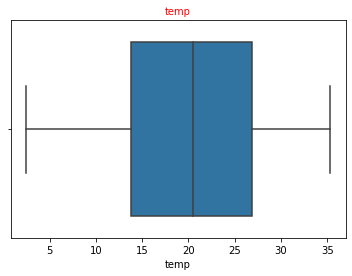

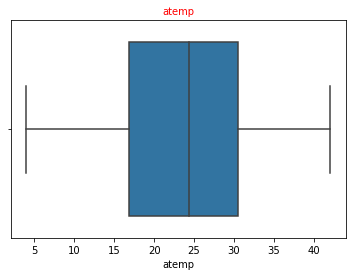

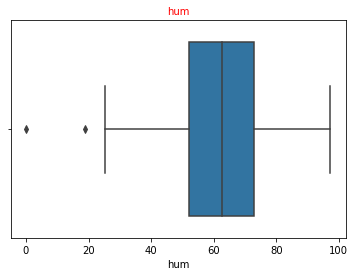

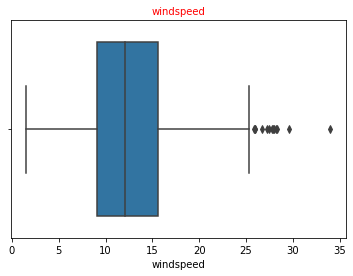

In [14]:
# Checking all the numeric-continuous independent variables for outliers except for the target (dependent) variable
num_var = ['temp', 'atemp', 'hum', 'windspeed']
for i in range (len(num_var)):
    plt.title(num_var[i], fontsize= 10, color = 'Red', fontweight = 100)
    sns.boxplot(bikes[num_var[i]])
    plt.show()

There seems to be few outliers in the data. Most of these are in windspeed, however most of it is in acceptable range. Windspeed > 25 is too breezy. Similarly Humidity = 0 seems to be a data capture error. Dropping such records.

In [15]:
bikes = bikes[~((bikes.hum < 20) | (bikes.windspeed > 30))]

In [16]:
bikes.shape

(728, 12)

Let's plot these variables in following order to draw initial inferences:-
- Draw a pairplot among the continuous numeric varaibles
- Draw box plot among the categorical numerical variables

<Figure size 1800x1440 with 0 Axes>

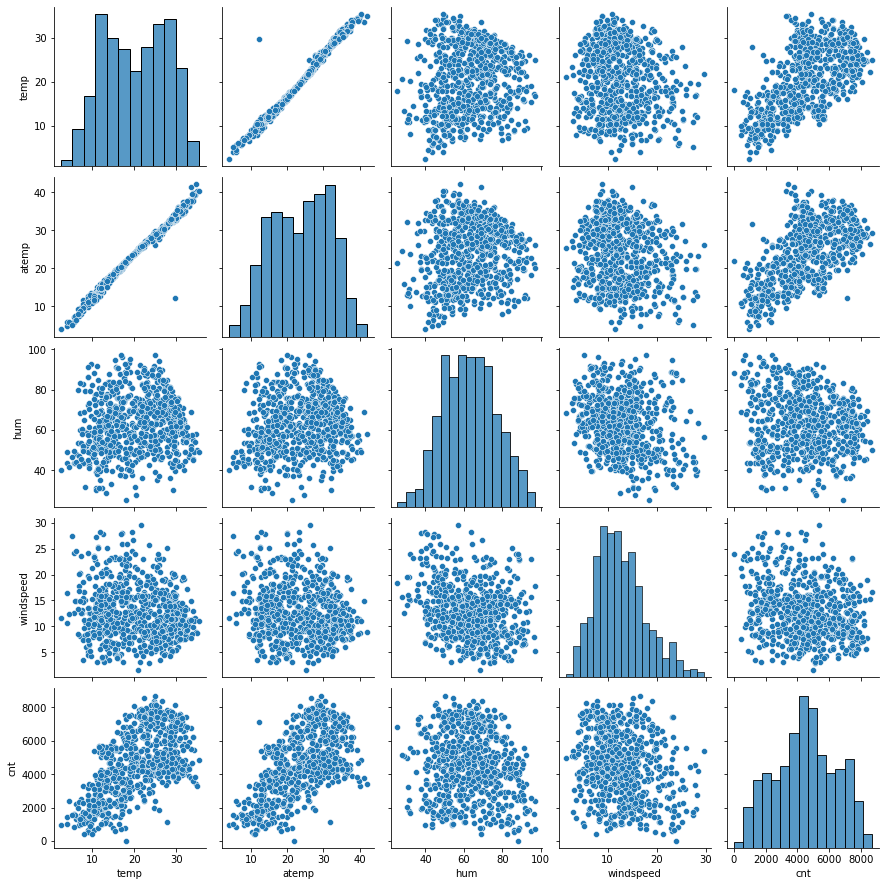

In [17]:
# pairplot among the continuous numeric variables
plt.figure(figsize=(25, 20))
sns.pairplot(bikes, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

From the above pairplot among the numeric variables, following observations can be drawn:-
- cnt varaible has a good linear relation with temp & atemp
- cnt variable may have some liner relation with hum & windspeed
- temp & atemp seems to having colinearity. Will continue with these varaibles for now to select the best one.

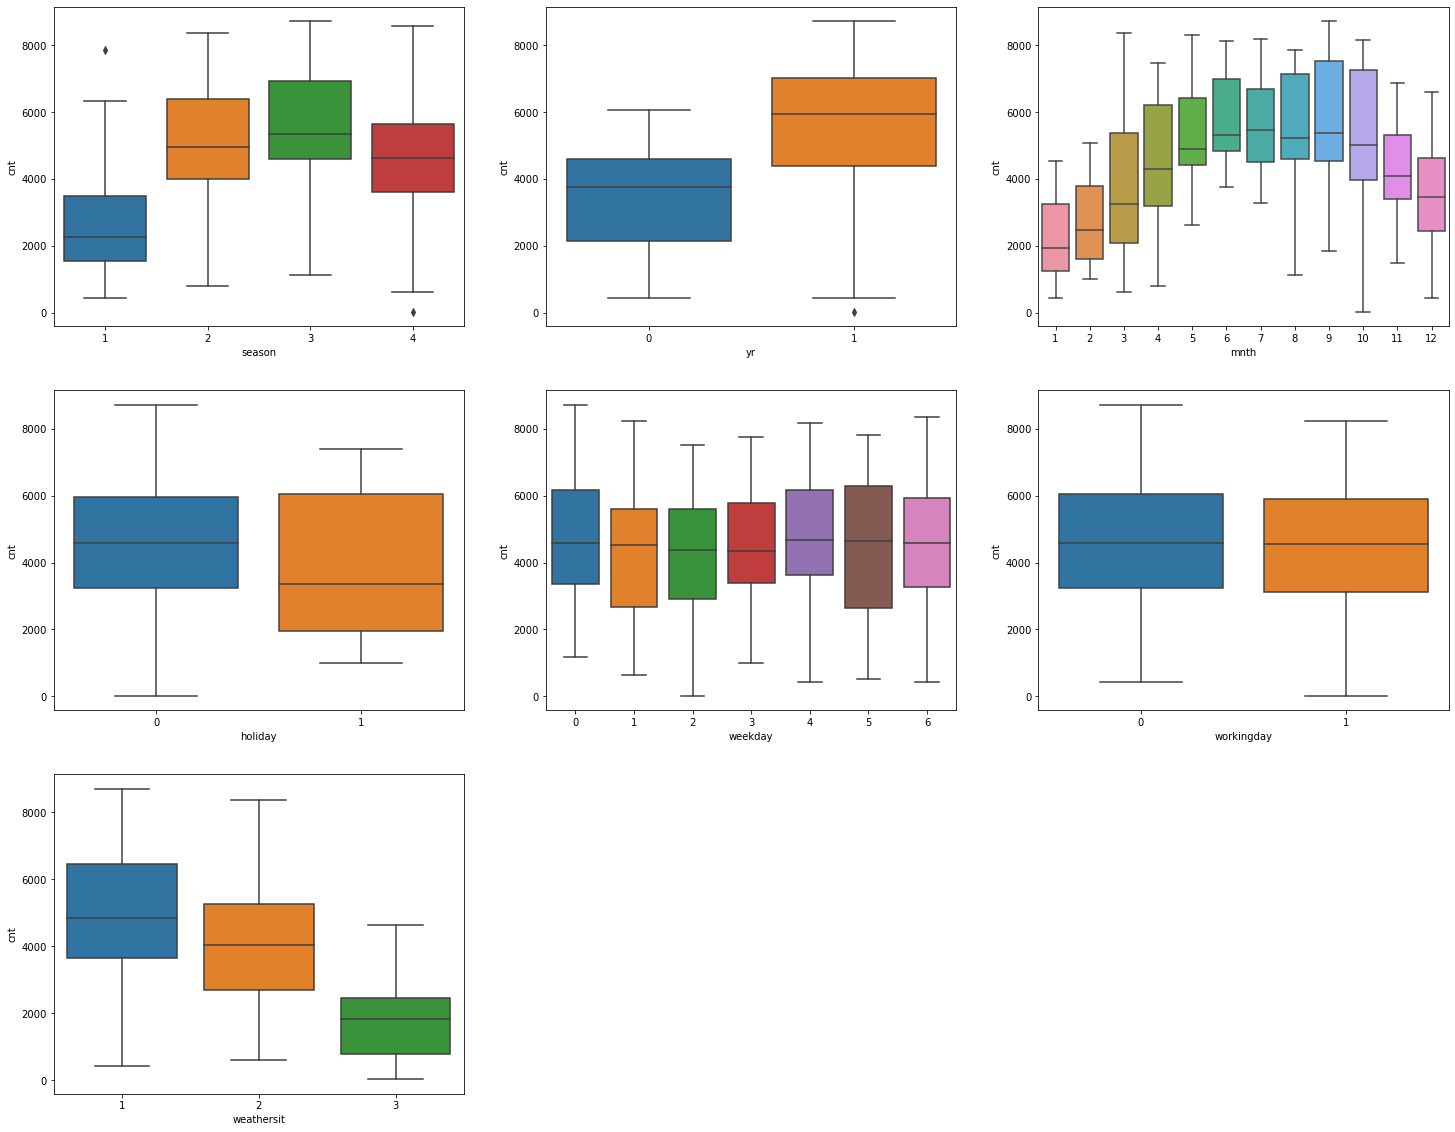

In [18]:
# box plot among categorical numeric variables

plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x=bikes.season, y=bikes.cnt)

plt.subplot(3,3,2)
sns.boxplot(x=bikes.yr, y=bikes.cnt)

plt.subplot(3,3,3)
sns.boxplot(x=bikes.mnth, y=bikes.cnt)

plt.subplot(3,3,4)
sns.boxplot(x=bikes.holiday, y=bikes.cnt)

plt.subplot(3,3,5)
sns.boxplot(x=bikes.weekday, y=bikes.cnt)

plt.subplot(3,3,6)
sns.boxplot(x=bikes.workingday, y=bikes.cnt)

plt.subplot(3,3,7)
sns.boxplot(x=bikes.weathersit, y=bikes.cnt)

plt.show()


We see some outliers in the season Vs cnt and yr Vs cnt plots. They needs to be handled as they will impact the model.

In [19]:
bikes = bikes[~(((bikes.season == 1) & (bikes.cnt > 7000)) | ((bikes.season == 4) & (bikes.cnt <= 50)) | ((bikes.yr == 1) & (bikes.cnt <= 50)))]

In [20]:
bikes.shape

(726, 12)

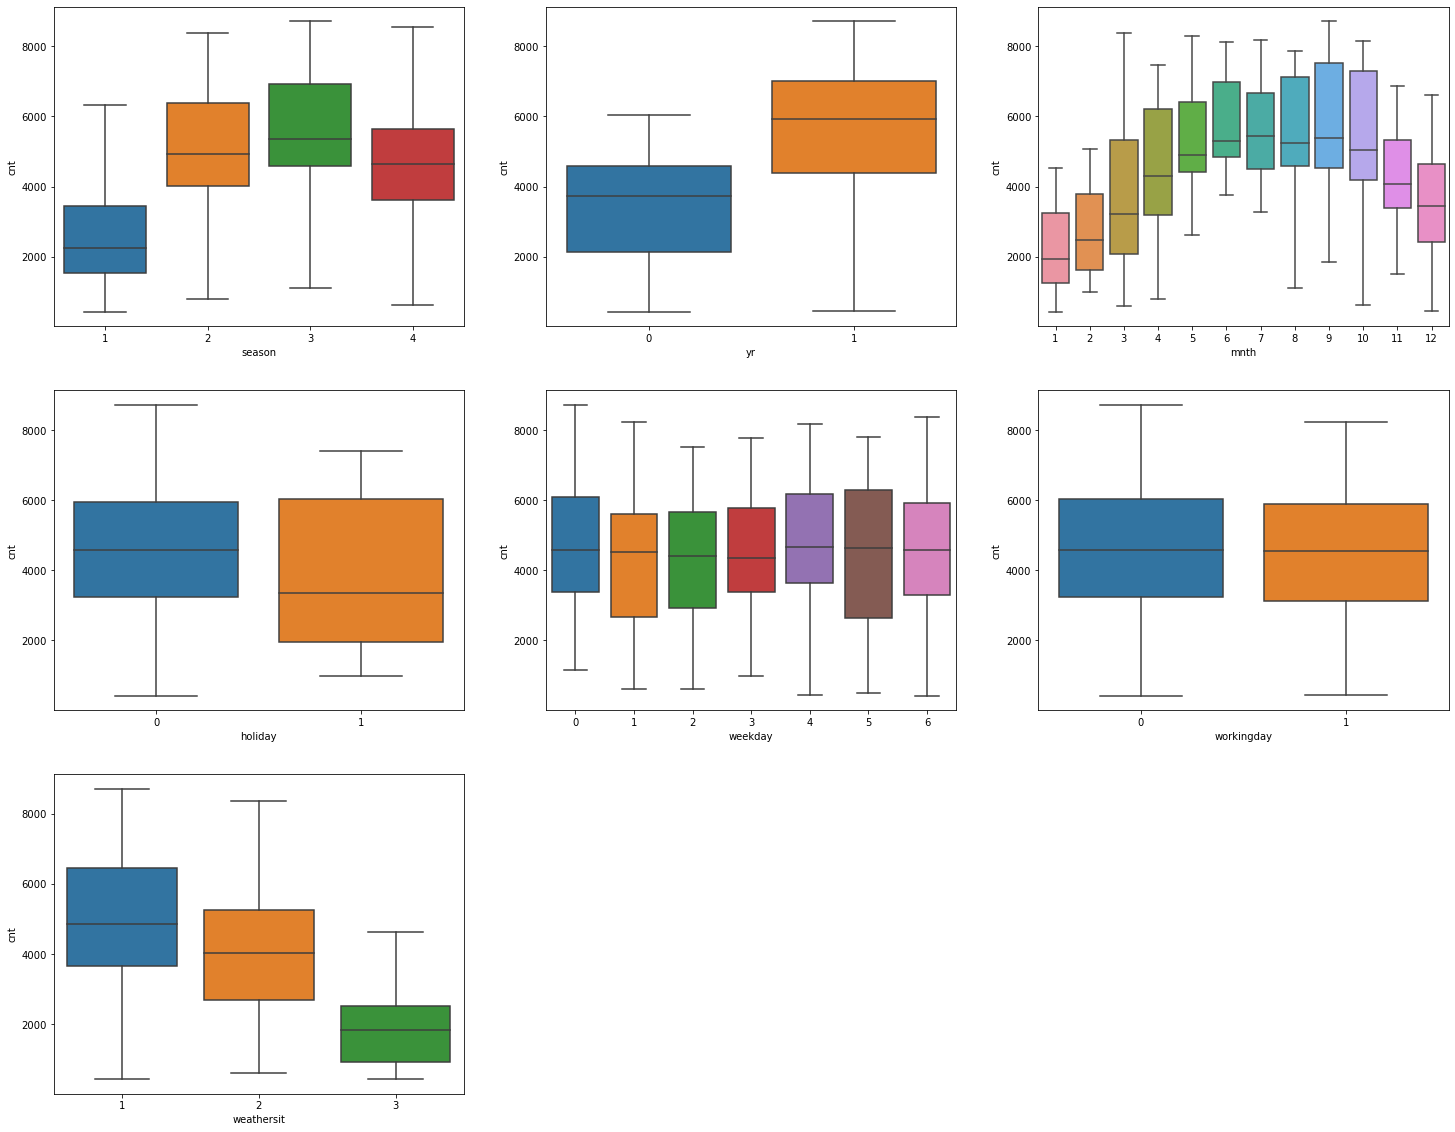

In [21]:
# rechecking the distribution of box plot among categorical numeric variables

plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x=bikes.season, y=bikes.cnt)

plt.subplot(3,3,2)
sns.boxplot(x=bikes.yr, y=bikes.cnt)

plt.subplot(3,3,3)
sns.boxplot(x=bikes.mnth, y=bikes.cnt)

plt.subplot(3,3,4)
sns.boxplot(x=bikes.holiday, y=bikes.cnt)

plt.subplot(3,3,5)
sns.boxplot(x=bikes.weekday, y=bikes.cnt)

plt.subplot(3,3,6)
sns.boxplot(x=bikes.workingday, y=bikes.cnt)

plt.subplot(3,3,7)
sns.boxplot(x=bikes.weathersit, y=bikes.cnt)

plt.show()

The plot for seasons and has a similar shape as years. Hence, there is a huge chance of colinearity between them. WIll continue with both the valriables as of now and handle them during model building.

### Step 3: Data Preparation
- Prepare dummy variables

In [22]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


For all the categorical variables having more than 2 values, difference can be seen upon change in value. Hence, it seems to be a good option to create dummy variables for them. 
For the weekday variable however, this difference is not clear. Upon segragating the weekend and weekdays seperately also the difference is not clear. Hence, for this variable min-max scaling will be used.

#### Defining Dummy Variables
- season (1:spring, 2:summer, 3:fall, 4:winter)
- weathersit (1:clear, 2:misty, 3:lightrainy, 4:heavyrain)
- mnth (1:jan, 2:feb, 3:march, 4:april, 5:may, 6:june, 7:july, 8:aug, 9:sep, 10:oct, 11:nov, 12:dec)

In [23]:
# Dummy variable definition and DF cleansing for season variable
season = pd.get_dummies(bikes.season, drop_first=True)
season.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [24]:
# concatenate the new DF for season with the main bikes DF
bikes = pd.concat([season, bikes], axis=1)
bikes.head()

,summer,fall,winter,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# dropping the season column
bikes.drop('season', axis=1, inplace=True)
bikes.head()

,summer,fall,winter,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Dummy variable definition and DF cleansing for weathersit variable
weathersit = pd.get_dummies(bikes.weathersit, drop_first=True)
weathersit.rename(columns={2:'misty', 3:'rainy'}, inplace=True)
weathersit.head()

,misty,rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
bikes = pd.concat([weathersit, bikes], axis=1)
bikes.head()

,misty,rainy,summer,fall,winter,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
# dropping the weathersit column
bikes.drop('weathersit', axis=1, inplace=True)
bikes.head()

,misty,rainy,summer,fall,winter,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
# Dummy variable definition and DF cleansing for mnth variable
mnth = pd.get_dummies(bikes.mnth, drop_first=True)
mnth.rename(columns={2:'feb', 3:'march', 4:'april', 5:'may', 6:'june',
                     7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}, 
                     inplace=True)
mnth.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [30]:
bikes = pd.concat([mnth, bikes], axis=1)
bikes.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,...,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
# dropping the weathersit column
bikes.drop('mnth', axis=1, inplace=True)
bikes.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,...,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 4: Splitting the Data into Training and Testing Sets
- Define the train & test DF
- rescaling the train DF

In [32]:
# splitting the data into train & test DF's
# based on multiple tries with 70:30 and 80:20 options; not much difference was noticed in the final model. Hence, selecting 
# the 70:30 model.
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
bikes.shape

(726, 25)

In [34]:
df_train.shape

(508, 25)

In [35]:
df_test.shape

(218, 25)

In [36]:
# Min Max function will be used to scale the data between 0 & 1
scaler = MinMaxScaler()

In [37]:
bikes.describe()

,feb,march,april,may,june,july,aug,sep,oct,nov,...,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,...,726.000000,726.000000,726.000000,726.00000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,0.075758,0.082645,0.082645,0.085399,0.082645,0.085399,0.085399,0.082645,0.084022,0.082645,...,0.243802,0.500000,0.028926,3.00000,0.691460,20.332810,23.738483,62.859783,12.719669,4518.910468
std,0.264792,0.275534,0.275534,0.279668,0.275534,0.279668,0.279668,0.275534,0.277612,0.275534,...,0.429670,0.500345,0.167713,1.99793,0.462209,7.523688,8.169170,13.950360,5.126073,1921.838669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,2.424346,3.953480,25.416700,1.500244,431.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,13.777701,16.869600,52.052075,9.041650,3196.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,3.00000,1.000000,20.551250,24.431350,62.625000,12.125057,4551.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,5.00000,1.000000,26.889153,30.508662,72.958300,15.620748,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.00000,1.000000,35.328347,42.044800,97.250000,29.584721,8714.000000


In [38]:
# identifying the variables that needs scaling
vars_for_scale = ['weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [39]:
#scaling the variables using the min-max scaler. All the scaled variables are expected to come in range of 0 & 1.
df_train[vars_for_scale] = scaler.fit_transform(df_train[vars_for_scale])
df_train.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,...,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
422,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0.500000,1,0.383206,0.373189,0.329466,0.565370,0.469757
728,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.166667,1,0.245101,0.204242,0.319025,0.772556,0.164795
546,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0.166667,1,0.942889,0.898646,0.368329,0.316148,0.615719
113,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0.333333,1,0.651106,0.632534,0.774941,0.375373,0.453942
579,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1.000000,0,0.880586,0.861496,0.540603,0.434525,0.814198


In [40]:
pd.set_option('max_columns', None)
df_train.describe()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.070866,0.086614,0.070866,0.086614,0.068898,0.076772,0.088583,0.090551,0.082677,0.094488,0.092520,0.358268,0.023622,0.230315,0.259843,0.261811,0.500000,0.027559,0.493110,0.673228,0.535729,0.520890,0.525613,0.369359,0.493948
std,0.256854,0.281546,0.256854,0.281546,0.253530,0.266491,0.284421,0.287253,0.275665,0.292795,0.290044,0.479964,0.152018,0.421449,0.438980,0.440054,0.500493,0.163867,0.339532,0.469495,0.225151,0.214257,0.195962,0.191495,0.237316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.338036,0.330941,0.373404,0.232054,0.323434
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,1.000000,0.532212,0.529479,0.523202,0.352763,0.492213
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.833333,1.000000,0.735474,0.702257,0.668793,0.478146,0.677351
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


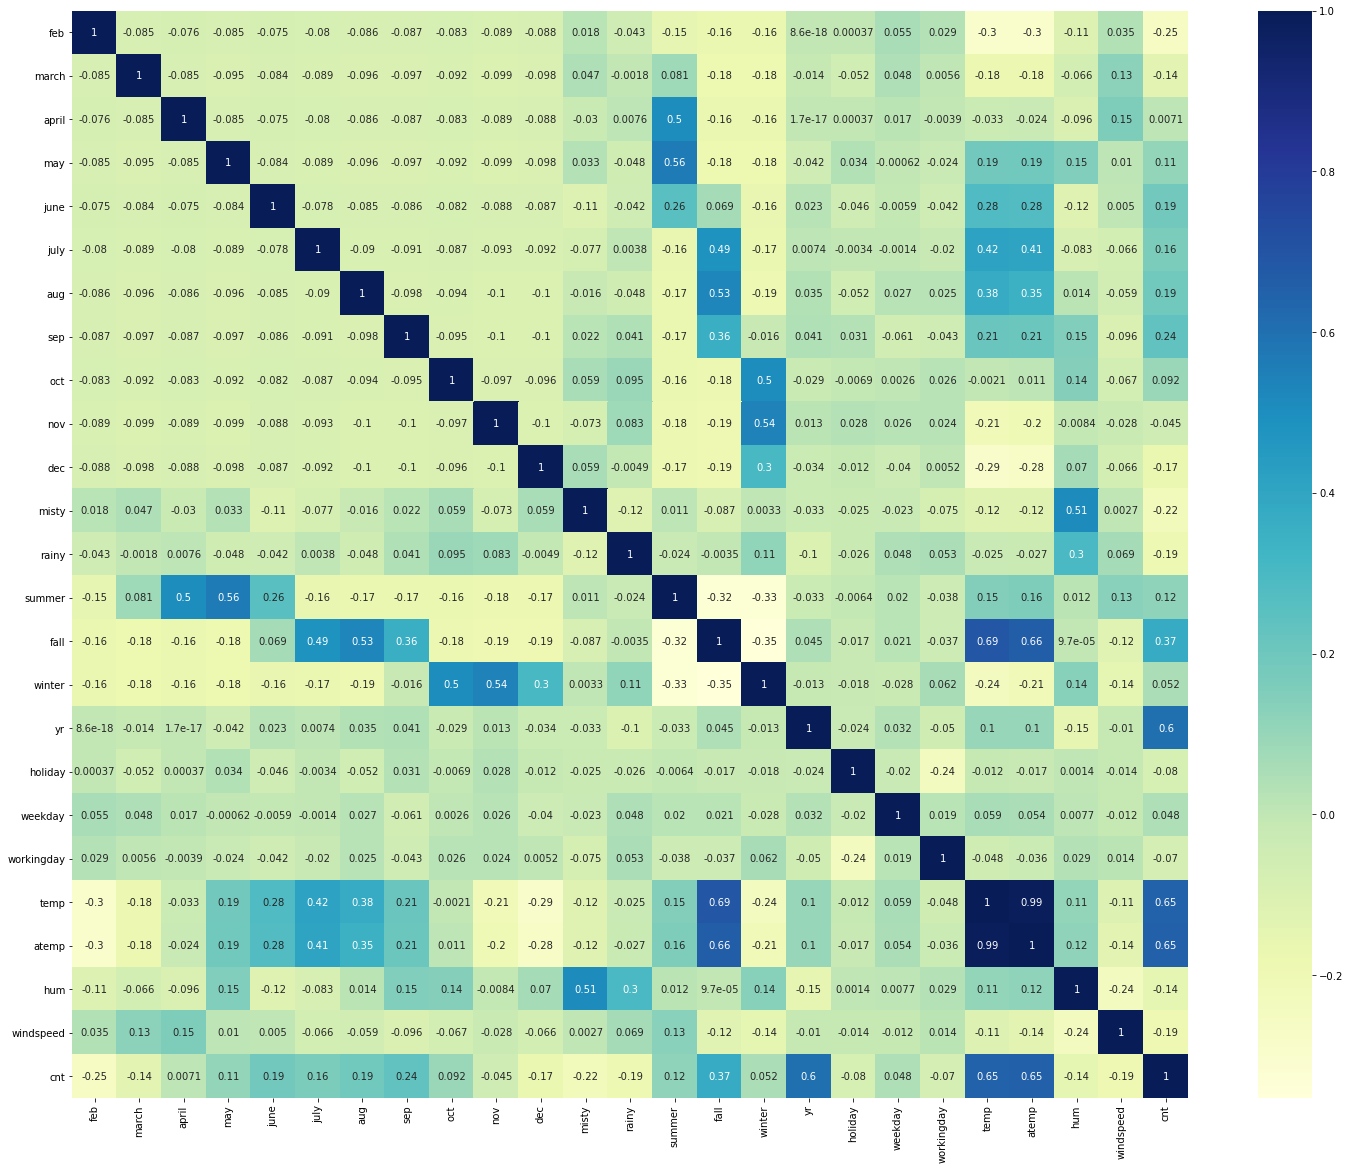

In [41]:
# lets see the heatmap and identify relationship among variable specially against cnt
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### The above heatmap shows shows high level colinearity among following variables:-
- cnt Vs temp & atemp
- negative relation between cnt Vs holiday & rainy season
- There are other relations also which we will see during the model building but the above ones stand out

#### Dividing into X and y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed
422,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.500000,1,0.383206,0.373189,0.329466,0.565370
728,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.166667,1,0.245101,0.204242,0.319025,0.772556
546,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.166667,1,0.942889,0.898646,0.368329,0.316148
113,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.333333,1,0.651106,0.632534,0.774941,0.375373
579,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1.000000,0,0.880586,0.861496,0.540603,0.434525


In [44]:
X_train.shape

(508, 24)

### Step 5: Building the Model

To start with; will take the RFE (Recursive Feature Elimination) approach.
Based on multiple tests; trying various combinations of RFE followed by removing variables, it is noticed that having variables in range of 7 & 14 (and even higher) has a very low impact on Adjusted R-Squared with its value ranging between 75 and 82. Also, this range of variable provide a model in-line with assumptions for the linear regression. These models also provide good R2 score for the test data.
Hence, the best way is to keep the model simple with minimum number of variables. Having too many variables will also make the model overfitting which will work wonderfully for train & test data but result will be unpredicted in our data range but for data no present in train & test datasets. At RFE with 6 variables, the adjusted R-squared detoriates significantly. Hence, starting with 7 independent variables in this final model.

In [45]:
# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 7)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('feb', False, 13),
 ('march', False, 8),
 ('april', False, 12),
 ('may', False, 10),
 ('june', False, 11),
 ('july', False, 16),
 ('aug', False, 9),
 ('sep', False, 2),
 ('oct', False, 6),
 ('nov', False, 14),
 ('dec', False, 17),
 ('misty', False, 7),
 ('rainy', True, 1),
 ('summer', False, 3),
 ('fall', False, 5),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', False, 4),
 ('weekday', False, 18),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

Dropping all the variables suggested by the RFE approach

In [47]:
cols = X_train.columns[rfe.support_]
cols

Index(['rainy', 'winter', 'yr', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')

In [48]:
cols_del = X_train.columns[~rfe.support_]
cols_del

Index(['feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct',
       'nov', 'dec', 'misty', 'summer', 'fall', 'holiday', 'weekday',
       'workingday'],
      dtype='object')

In [49]:
X_train_rfe = X_train[cols]
X_train_rfe.head()

,rainy,winter,yr,temp,atemp,hum,windspeed
422,0,0,1,0.383206,0.373189,0.329466,0.565370
728,0,0,1,0.245101,0.204242,0.319025,0.772556
546,0,0,1,0.942889,0.898646,0.368329,0.316148
113,0,0,0,0.651106,0.632534,0.774941,0.375373
579,0,0,1,0.880586,0.861496,0.540603,0.434525


Now we have a starting point with 7 variables at hand. We will start with all these variables and remove them one by one based on stats from statsmodel library.

In [50]:
# adding the constant
X_train_sm = sm.add_constant(X_train_rfe)
X_train_sm.head()

,const,rainy,winter,yr,temp,atemp,hum,windspeed
422,1.0,0,0,1,0.383206,0.373189,0.329466,0.565370
728,1.0,0,0,1,0.245101,0.204242,0.319025,0.772556
546,1.0,0,0,1,0.942889,0.898646,0.368329,0.316148
113,1.0,0,0,0,0.651106,0.632534,0.774941,0.375373
579,1.0,0,0,1,0.880586,0.861496,0.540603,0.434525


Model building : Iteration # 1

In [51]:
# Building the first model with these 7 variables
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     285.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          4.69e-170
Time:                        22:44:35   Log-Likelihood:                 418.76
No. Observations:                 508   AIC:                            -821.5
Df Residuals:                     500   BIC:                            -787.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1321      0.024      5.535      0.000       0.085       0.179
rainy         -0.1289      0.033     -3.860      0.000      -0.195      -0.063
winter         0.1219      0.012     10.579      0.000       0.099       0.145
yr             0.2371      0.010     24.458      0.000       0.218       0.256
temp           0.4179      0.150      2.795      0.005       0.124       0.712
atemp          0.2899      0.157      1.846      0.065      -0.019       0.598
hum           -0.2113      0.027     -7.827      0.000      -0.264      -0.158
windspeed     -0.1337      0.027     -5.028      0.000      -0.186      -0.081
==============================================================================
Omnibus:                       47.408   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.027
Skew:                          -0.614   Prob(JB):                     6.91e-18
Kurtosis:                       4.492   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Major observations:-
- Adjusted R squared is ~80%. Very nice R square specially to start with.
- Prob F-stats is near 0. A favourable condition for the model.
- P-value for most variables is in acceptable range.

Lets check the VIF before making next move.

In [52]:
# Create a dataframe that will contain all the variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,341.96
3,temp,334.43
5,hum,6.19
6,windspeed,3.20
2,yr,1.97
1,winter,1.46
0,rainy,1.12


Model building : Iteration # 2

As can be seen, the the p-value as well as VIF is very high for the variable atemp meaning it is less significant and has high colinearity with other variables. Hence, dropping it.

In [53]:
X = X_train_rfe.drop('atemp', axis=1)
X.head()

,rainy,winter,yr,temp,hum,windspeed
422,0,0,1,0.383206,0.329466,0.565370
728,0,0,1,0.245101,0.319025,0.772556
546,0,0,1,0.942889,0.368329,0.316148
113,0,0,0,0.651106,0.774941,0.375373
579,0,0,1,0.880586,0.540603,0.434525


In [54]:
# Adding constant
X_train_sm = sm.add_constant(X)
X_train_sm.head()

,const,rainy,winter,yr,temp,hum,windspeed
422,1.0,0,0,1,0.383206,0.329466,0.565370
728,1.0,0,0,1,0.245101,0.319025,0.772556
546,1.0,0,0,1,0.942889,0.368329,0.316148
113,1.0,0,0,0,0.651106,0.774941,0.375373
579,1.0,0,0,1,0.880586,0.540603,0.434525


In [55]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     330.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.35e-170
Time:                        22:44:35   Log-Likelihood:                 417.03
No. Observations:                 508   AIC:                            -820.1
Df Residuals:                     501   BIC:                            -790.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1374      0.024      5.789      0.000       0.091       0.184
rainy         -0.1309      0.033     -3.913      0.000      -0.197      -0.065
winter         0.1244      0.011     10.845      0.000       0.102       0.147
yr             0.2373      0.010     24.419      0.000       0.218       0.256
temp           0.6910      0.022     30.912      0.000       0.647       0.735
hum           -0.2086      0.027     -7.718      0.000      -0.262      -0.155
windspeed     -0.1412      0.026     -5.360      0.000      -0.193      -0.089
==============================================================================
Omnibus:                       45.859   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.041
Skew:                          -0.594   Prob(JB):                     1.87e-17
Kurtosis:                       4.492   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# creating the VIF DF again with newer inputs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,6.02
3,temp,5.71
5,windspeed,3.17
2,yr,1.97
1,winter,1.42
0,rainy,1.12


The adjusted R-squared remains in same range and hence it was a nice decision to drop the variable. Now the p-values are also in acceptable range (< 5%). VIF for hum is high.

Model building : Iteration # 3

As can be seen, the hum variable has high VIF. Hence, dropping it.

In [57]:
X.drop('hum', axis=1, inplace=True)
X.head()

,rainy,winter,yr,temp,windspeed
422,0,0,1,0.383206,0.565370
728,0,0,1,0.245101,0.772556
546,0,0,1,0.942889,0.316148
113,0,0,0,0.651106,0.375373
579,0,0,1,0.880586,0.434525


In [58]:
X_train_sm = sm.add_constant(X)
X_train_sm.head()

,const,rainy,winter,yr,temp,windspeed
422,1.0,0,0,1,0.383206,0.565370
728,1.0,0,0,1,0.245101,0.772556
546,1.0,0,0,1,0.942889,0.316148
113,1.0,0,0,0,0.651106,0.375373
579,1.0,0,0,1,0.880586,0.434525


In [59]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     344.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.08e-159
Time:                        22:44:35   Log-Likelihood:                 388.50
No. Observations:                 508   AIC:                            -765.0
Df Residuals:                     502   BIC:                            -739.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      0.019      1.059      0.290      -0.017       0.058
rainy         -0.2107      0.034     -6.266      0.000      -0.277      -0.145
winter         0.1155      0.012      9.578      0.000       0.092       0.139
yr             0.2481      0.010     24.415      0.000       0.228       0.268
temp           0.6682      0.023     28.538      0.000       0.622       0.714
windspeed     -0.0915      0.027     -3.391      0.001      -0.145      -0.038
==============================================================================
Omnibus:                       41.637   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.940
Skew:                          -0.580   Prob(JB):                     1.31e-14
Kurtosis:                       4.294   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# creating the VIF DF again with newer inputs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,3.27
4,windspeed,2.94
2,yr,1.97
1,winter,1.24
0,rainy,1.06


At this point, we have a model that has low VIF (<5) for all the variables. At the same time the p-value of all these values is in acceptable range (less than 5%) and Adjusted R square value is 77.2% which is very good for a model.

This model can be summarized as:-

cnt = 0.0205 + 0.1155 * winter + 0.2481 * yr + 0.6682 * temp - (0.2107 * rainy + 0.0915 * windspeed)

Before proceeding further, lets plot few numeric variables against count and see if the model is fitting these variables well.
For this, only the all the variables will be considered 0 except for the test variable. 
For example, 
- while testing against temp: cnt = 0.0205 + 0.6682 * temp


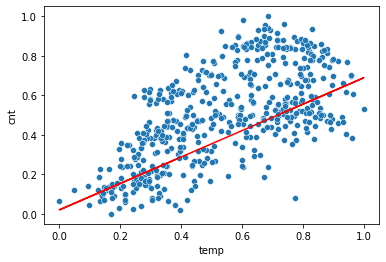

In [61]:
# plot of cnt Vs one of the numeric variables in the model (temp)
sns.scatterplot(X_train_sm.temp, y_train)
plt.plot(X_train_sm.temp, 0.0205 + 0.6682 * X_train_sm.temp, 'r')
plt.show()

### Step 6: Residual Analysis on Train DF

In [62]:
# Running the model on the train DF
y_train_pred = lr_model.predict(X_train_sm)

In [63]:
# computing the residue (difference in actual value and value predicted by the model)
res = y_train - y_train_pred

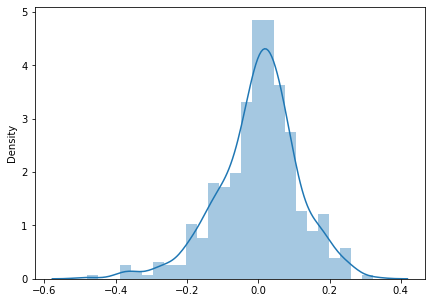

In [64]:
plt.figure(figsize = (7, 5))
sns.distplot(res)
plt.show()

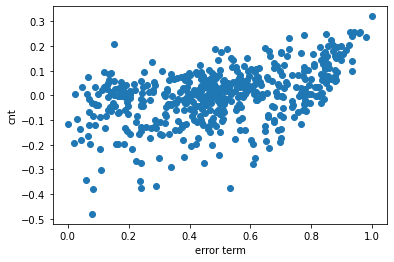

In [65]:
# plot between error and y_train
plt.scatter(y=res, x=y_train)
plt.xlabel('error term',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.ylabel('cnt',fontdict = {'fontsize': 10, 'fontweight' : '100'})
plt.show()

The assumptions for linear regression are:-
- There is a linear relationship between X and y
- Error terms are normally distributed with mean zero
- Error terms are independent of each other
- Error terms have constant variance

The linearity is provided by the model generated, while the distribution of error terms is normal and around 0. Also the scatter plot shows that the error term is largly independent (except towards the higher values of cnt) and constant.
Hence the model satisfies the assumptions for the linear regression.

### Step 7: Evaluating the Model on test DF

In [66]:
vars_for_scale

['weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [67]:
# Scaling the test DF in similar way as train DF. Here the data will not be fitted rather only transformed. 
df_test[vars_for_scale] = scaler.transform(df_test[vars_for_scale])
df_test.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
241,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.666667,1,0.722754,0.689995,0.409512,0.207143,0.576240
494,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.833333,1,0.556613,0.552272,0.414732,0.680658,0.741398
447,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.000000,0,0.552460,0.545514,0.878771,0.376895,0.355065
506,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.500000,1,0.692641,0.671423,0.712296,0.190009,0.681154
151,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.833333,1,0.878510,0.858954,0.588746,0.412734,0.427744


In [68]:
df_test.describe()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.087156,0.073394,0.110092,0.082569,0.114679,0.105505,0.077982,0.064220,0.087156,0.055046,0.068807,0.288991,0.032110,0.307339,0.256881,0.201835,0.500000,0.032110,0.516055,0.733945,0.564153,0.549582,0.511083,0.369957,0.492556
std,0.282713,0.261383,0.313724,0.275863,0.319367,0.307910,0.268760,0.245709,0.282713,0.228595,0.253709,0.454337,0.176698,0.462453,0.437919,0.402293,0.501151,0.176698,0.317395,0.442910,0.235950,0.227740,0.190101,0.192374,0.219719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.026455,0.030161,-0.049874,0.001207
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.376998,0.371213,0.364124,0.229347,0.346312
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,1.000000,0.565959,0.568319,0.513404,0.338758,0.509055
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.833333,1.000000,0.785575,0.755053,0.642703,0.475441,0.640136
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.019437,0.997100,0.951690,0.949294


In [69]:
# splitting the data into y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
X_test.head()

,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed
241,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.666667,1,0.722754,0.689995,0.409512,0.207143
494,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.833333,1,0.556613,0.552272,0.414732,0.680658
447,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.000000,0,0.552460,0.545514,0.878771,0.376895
506,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.500000,1,0.692641,0.671423,0.712296,0.190009
151,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.833333,1,0.878510,0.858954,0.588746,0.412734


In [71]:
# adding constant to the X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,feb,march,april,may,june,july,aug,sep,oct,nov,dec,misty,rainy,summer,fall,winter,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed
241,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.666667,1,0.722754,0.689995,0.409512,0.207143
494,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.833333,1,0.556613,0.552272,0.414732,0.680658
447,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.000000,0,0.552460,0.545514,0.878771,0.376895
506,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.500000,1,0.692641,0.671423,0.712296,0.190009
151,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0.833333,1,0.878510,0.858954,0.588746,0.412734


In [72]:
# dropping all the columns not used in the model. This will create the test DF similar looking to train DF
X_test_sm.drop(['feb', 'march', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct',
                'nov', 'dec', 'misty', 'summer', 'fall', 'holiday', 'weekday',
                'workingday', 'atemp', 'hum'],
                 axis=1, 
                 inplace=True)
X_test_sm.head()

,const,rainy,winter,yr,temp,windspeed
241,1.0,0,0,0,0.722754,0.207143
494,1.0,0,0,1,0.556613,0.680658
447,1.0,0,0,1,0.552460,0.376895
506,1.0,0,0,1,0.692641,0.190009
151,1.0,0,0,0,0.878510,0.412734


In [73]:
X_test_sm.shape

(218, 6)

In [74]:
X_train_sm.shape

(508, 6)

In [75]:
# executing the model on the test dataset and making prediction
y_test_pred = lr_model.predict(X_test_sm)

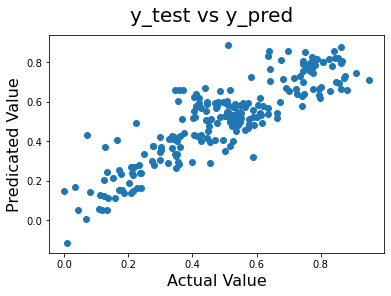

In [76]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)   
plt.xlabel('Actual Value', fontsize = 16)         
plt.ylabel('Predicated Value', fontsize = 16)     
plt.show()

There is a clear linearity in the scatter plot above. Sign that the model fit well on the test DF.

In [77]:
# lets do the residue analysis on the test DF also and see if the distribution is still normal around 0.
res_test = y_test_pred - y_test

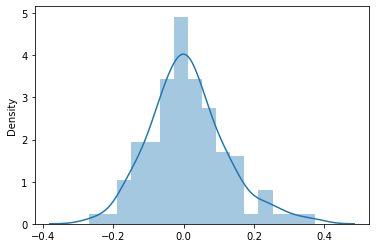

In [78]:
sns.distplot(res_test)
plt.show()

The model seems to be working well with the test DF also as there is linearity between predicted Vs actual value and error term is nurmally dictributed around 0.

Finally lets check the R-squared for the model in test dataset.

In [79]:
# R-Squared in test DF
r2_score(y_test, y_test_pred)

0.7500335203473615

Even the R-squared signifies the model worked well for the test sample. Hence, to predict the bike rental, we can suggest this linear regression model:

- cnt = 0.0205 + 0.1155 * winter + 0.2481 * yr + 0.6682 * temp - (0.2107 * rainy + 0.0915 * windspeed)
- R-Squared for Train DF = 77%
- R-Squared for Test DF = 75%

Based on the model, we can suggest that rainy weather and high windspeed have adverse impact on the cnt while winter, yr and temp have a positive impact on cnt.